In [ ]:
!git clone 'https://github.com/muxspace/facial_expressions'

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214
Receiving objects: 100% (14214/14214), 239.65 MiB | 34.50 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Checking out files: 100% (13996/13996), done.


In [ ]:
import pandas as pd
import numpy as np
import cv2



In [ ]:
details=pd.read_csv("/content/facial_expressions/data/legend.csv")
details

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral
...,...,...,...
13685,jhamski,SharmilaTagore_80.jpg,HAPPINESS
13686,jhamski,SharmilaTagore_81.jpg,HAPPINESS
13687,jhamski,SharmilaTagore_82.jpg,HAPPINESS
13688,jhamski,SharmilaTagore_83.jpg,HAPPINESS


In [ ]:
temp=details.values
temp[2]

array(['628', 'facial-expressions_2868584k.jpg', 'disgust'], dtype=object)

In [ ]:
emo=np.unique(details.emotion)
for i in range(len(emo)):
  emo[i]=emo[i].lower()
emo =list(set(emo))
emo 

['sadness',
 'fear',
 'contempt',
 'neutral',
 'happiness',
 'surprise',
 'disgust',
 'anger']

In [ ]:
data={}
for row in temp:
  key=row[2].lower()
  if key in data:
    data[key].append(row[1])
  else:
    data[key]=[row[1]]


In [ ]:
data.keys()

dict_keys(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness', 'sadness', 'contempt'])

In [ ]:
import os
os.mkdir('Master data')
os.mkdir('Master data/train')
os.mkdir('Master data/test')

In [ ]:
for emot in emo:
  os.mkdir(os.path.join('Master data/train',emot))
  os.mkdir(os.path.join('Master data/test',emot))

In [ ]:
from shutil import copyfile
split_size=0.8
for emotion, image in data.items():
  trainsize=int(split_size*len(image))
  train_images=image[:trainsize]
  test_images=image[trainsize:]
  for imag in train_images:
    source=os.path.join("/content/facial_expressions/images",imag)
    dest=os.path.join("/content/Master data/train",emotion,imag)
    copyfile(source,dest)
  for imag in test_images:
    source=os.path.join("/content/facial_expressions/images",imag)
    dest=os.path.join("/content/Master data/test",emotion,imag)
    copyfile(source,dest)  

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import MaxPool2D,Conv2D,Flatten,Dense
from keras.models import Sequential

In [ ]:
from keras.backend import categorical_crossentropy
model=Sequential([Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3)),MaxPool2D(2,2)
,Conv2D(32,(3,3),activation='relu'),MaxPool2D(2,2),
Conv2D(64,(3,3),activation='relu'),MaxPool2D(2,2),
Conv2D(128,(3,3),activation='relu'),MaxPool2D(2,2),
Conv2D(256,(3,3),activation='relu'),MaxPool2D(2,2),
Flatten(),
Dense(1700,activation='relu'),






















































































































































































































































































































































































Dense(8,activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [ ]:
train_dir="/content/Master data/train"
test_dir="/content/Master data/test"
trainDataGen=ImageDataGenerator(rescale=1.0/255)
train_gen=trainDataGen.flow_from_directory(train_dir,class_mode='categorical',target_size=(100,100),batch_size=128)
testDataGen=ImageDataGenerator(rescale=1.0/255)
test_gen=testDataGen.flow_from_directory(test_dir,class_mode='categorical',target_size=(100,100),batch_size=128)

Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [ ]:
es=EarlyStopping(monitor='val_acc',patience=30,min_delta=.01)

In [ ]:
history=model.fit_generator(train_gen,epochs=1000,verbose=1,callbacks=[es],validation_data=test_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/1000
86/86 [==============================] - 32s 229ms/step - loss: 1.0403 - acc: 0.4873 - val_loss: 2.3669 - val_acc: 0.4774
Epoch 2/1000
86/86 [==============================] - 19s 216ms/step - loss: 0.9820 - acc: 0.4989 - val_loss: 1.7554 - val_acc: 0.4781
Epoch 3/1000
86/86 [==============================] - 19s 217ms/step - loss: 0.9867 - acc: 0.4992 - val_loss: 2.5927 - val_acc: 0.4752
Epoch 4/1000
86/86 [==============================] - 19s 218ms/step - loss: 0.9702 - acc: 0.5064 - val_loss: 2.3583 - val_acc: 0.4756
Epoch 5/1000
86/86 [==============================] - 19s 219ms/step - loss: 0.9739 - acc: 0.5030 - val_loss: 2.2435 - val_acc: 0.4712
Epoch 6/1000
86/86 [==============================] - 19s 221ms/step - loss: 0.8582 - acc: 0.6218 - val_loss: 3.1374 - val_acc: 0.6291
Epoch 7/1000
86/86 [==============================] - 19s 223ms/step - loss: 0.6169 - acc: 0.8014 - val_loss: 2.0845 - val_acc: 0.6637
Epoch 8/1000
86/86 [==============================] - 1

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

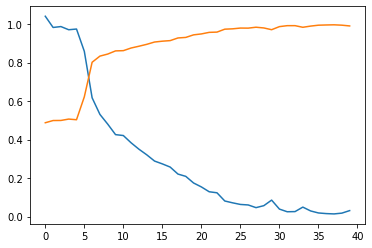

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

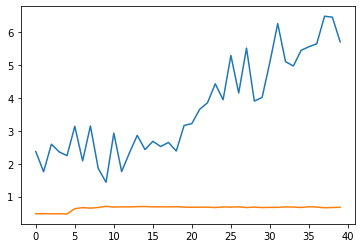

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])

In [ ]:
model.save("emotion.h5")

In [ ]:
img=cv2.imread('/content/Master data/train/disgust/Avinash_2.jpg')
img=cv2.resize(img,(100,100))
img=img.reshape(1,100,100,3)
res=model.predict(img)
key=list(data.keys())
key[np.argmax(res)]

'neutral'

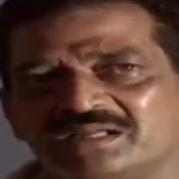

In [ ]:
img=cv2.imread('/content/Master data/train/disgust/Avinash_2.jpg')
from google.colab.patches import cv2_imshow
cv2_imshow(img)

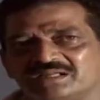

In [ ]:
img=cv2.resize(img,(100,100))
cv2_imshow(img)

In [ ]:
img=img.reshape(1,100,100,3)

'anger'

In [ ]:
res

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

'anger'

In [ ]:
# import pickle
# with open('emotion.pkl','wb') as f1:
#   pickle.dump(model,f1)
